In [15]:
import pandas as pd
from google.colab import files

# Si le fichier est sur votre ordinateur local
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Charger le dataset
df = pd.read_csv('diabetes.csv')

# Afficher les premières lignes pour vérifier le chargement
print(df.head())

Saving diabetes.csv to diabetes.csv
User uploaded file "diabetes.csv" with length 23875 bytes
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [16]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Identifier les colonnes avec des zéros à traiter comme manquants
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Remplacer les zéros par NaN
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Imputation par la moyenne (vous pouvez aussi utiliser 'median')
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df[cols_with_zeros] = imputer.fit_transform(df[cols_with_zeros])

# Séparer les caractéristiques (X) et la cible (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardiser les caractéristiques numériques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

print("\nNettoyage et prétraitement terminés.")
print(df.head())


Nettoyage et prétraitement terminés.
   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


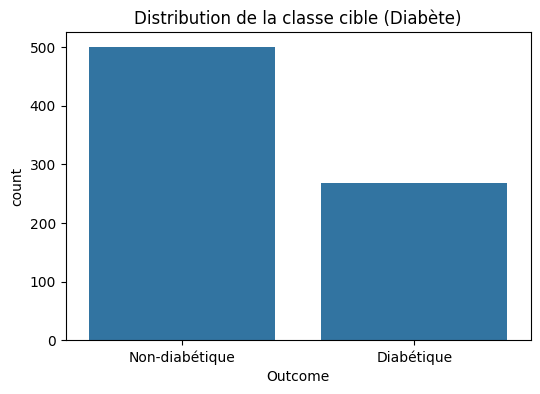


Statistiques descriptives par classe:
        Pregnancies                                                Glucose  \
              count      mean       std  min   25%  50%  75%   max   count   
Outcome                                                                      
0             500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0   500.0   
1             268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0   268.0   

                     ... DiabetesPedigreeFunction           Age             \
               mean  ...                      75%    max  count       mean   
Outcome              ...                                                     
0        110.710121  ...                  0.56175  2.329  500.0  31.190000   
1        142.165573  ...                  0.72800  2.420  268.0  37.067164   

                                                  
               std   min   25%   50%   75%   max  
Outcome                                           
0        11.667655  21.0  

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Barplot de la distribution de la classe cible
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title("Distribution de la classe cible (Diabète)")
plt.xticks([0, 1], ['Non-diabétique', 'Diabétique'])
plt.show()

# Statistiques descriptives par classe
print("\nStatistiques descriptives par classe:")
print(df.groupby('Outcome').describe())

In [18]:
from sklearn.model_selection import train_test_split

# Split initial en train (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split du set d'entraînement en train (60% de l'original) et validation (20% de l'original)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train) # 0.25 * 0.8 = 0.2

print(f"\nTaille de l'ensemble d'entraînement : {len(X_train)}")
print(f"Taille de l'ensemble de validation : {len(X_val)}")
print(f"Taille de l'ensemble de test : {len(X_test)}")


Taille de l'ensemble d'entraînement : 460
Taille de l'ensemble de validation : 154
Taille de l'ensemble de test : 154


In [19]:
from imblearn.over_sampling import SMOTE

# Appliquer SMOTE sur l'ensemble d'entraînement
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"\nTaille de l'ensemble d'entraînement après SMOTE : {len(X_train_res)}")
print("Distribution de la classe cible après SMOTE :")
print(y_train_res.value_counts())


Taille de l'ensemble d'entraînement après SMOTE : 600
Distribution de la classe cible après SMOTE :
Outcome
0    300
1    300
Name: count, dtype: int64


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Entraîner le modèle de régression logistique
model = LogisticRegression(random_state=42)
model.fit(X_train_res, y_train_res)

# Prédictions sur l'ensemble de validation
y_pred_val = model.predict(X_val)

# Évaluation sur l'ensemble de validation
accuracy_val = accuracy_score(y_val, y_pred_val)
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1_val = f1_score(y_val, y_pred_val)

print("\nÉvaluation sur l'ensemble de validation:")
print(f"Accuracy: {accuracy_val:.4f}")
print(f"Precision: {precision_val:.4f}")
print(f"Recall: {recall_val:.4f}")
print(f"F1 Score: {f1_val:.4f}")


Évaluation sur l'ensemble de validation:
Accuracy: 0.7597
Precision: 0.6545
Recall: 0.6667
F1 Score: 0.6606


In [21]:
from sklearn.metrics import confusion_matrix, classification_report

# Prédictions sur l'ensemble de test
y_pred_test = model.predict(X_test)

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("\nMatrice de confusion sur l'ensemble de test:")
print(conf_matrix)

# Rapport de classification
class_report = classification_report(y_test, y_pred_test, target_names=['Non-diabétique', 'Diabétique'])
print("\nRapport de classification sur l'ensemble de test:")
print(class_report)


Matrice de confusion sur l'ensemble de test:
[[76 24]
 [15 39]]

Rapport de classification sur l'ensemble de test:
                precision    recall  f1-score   support

Non-diabétique       0.84      0.76      0.80       100
    Diabétique       0.62      0.72      0.67        54

      accuracy                           0.75       154
     macro avg       0.73      0.74      0.73       154
  weighted avg       0.76      0.75      0.75       154



In [22]:
# Importance des caractéristiques (coefficients de la régression logistique)
feature_importance = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_[0]})
feature_importance = feature_importance.sort_values('coefficient', ascending=False)
print("\nImportance des caractéristiques (Coefficients de la Régression Logistique):")
print(feature_importance)

# Analyse des erreurs (faux positifs et faux négatifs)
errors = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test, 'Difference': y_test - y_pred_test})
false_positives = errors[(errors['Actual'] == 0) & (errors['Predicted'] == 1)]
false_negatives = errors[(errors['Actual'] == 1) & (errors['Predicted'] == 0)]

print(f"\nNombre de faux positifs : {len(false_positives)}")
print(f"Nombre de faux négatifs : {len(false_negatives)}")

# Pour une analyse plus approfondie, vous pouvez examiner les caractéristiques
# des exemples spécifiques de faux positifs/négatifs.
# print("\nExemples de faux positifs:")
# print(X_test.loc[false_positives.index])
# print("\nExemples de faux négatifs:")
# print(X_test.loc[false_negatives.index])


Importance des caractéristiques (Coefficients de la Régression Logistique):
                    feature  coefficient
1                   Glucose     1.344007
5                       BMI     0.910215
0               Pregnancies     0.338100
6  DiabetesPedigreeFunction     0.315942
7                       Age     0.102337
4                   Insulin    -0.113641
3             SkinThickness    -0.139249
2             BloodPressure    -0.183452

Nombre de faux positifs : 24
Nombre de faux négatifs : 15
